In [44]:
%reload_ext autoreload
%autoreload 2

In [45]:
from src.data.unified_dataloader import load_dataset
_,processed_recruit =load_dataset('recruit')


In [46]:
processed_recruit.head(3)

,age,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,sex,nationality_Belgian,...,sport_Swimming,sport_Tennis,ind-degree_bachelor,ind-degree_master,ind-degree_phd,company_A,company_B,company_C,company_D,decision
0,-0.776239,1.288151,0,0,0,0,-0.393770,1,0,0,...,1,0,0,0,1,1,0,0,0,1
1,-0.063766,0.781005,0,1,0,0,0.777294,1,1,0,...,0,0,1,0,0,1,0,0,0,0
2,-1.132475,0.781005,0,1,1,0,-1.564835,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [47]:
df = processed_recruit.copy()
X = df.drop('decision', axis=1)
y = df['decision']

In [49]:
from src.evaluation.five_fold_cross_validation import evaluate_model
from xgboost import XGBClassifier
model = XGBClassifier()
evaluate_model(model=model, X_train=X, y_train=y, num_folds=5, dataset_name='recruit', fairshap_base='DR', matching_method='NN')

-------------------------------------
-------------1th fold----------------
-------------------------------------
1. Split the recruit dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
X_train_majority_label0 shape: (1115, 27)
X_train_majority_label1 shape: (569, 27)
X_train_minority_label0 shape: (1064, 27)
X_train_minority_label1 shape: (385, 27)
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 从 X_train_majority_label0中找到合适的值替换X_train_minority_label0中的数据
4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据
5. 计算出varphi和q
在X_train_minority中shapely value中大于0.05的值的个数有: 247
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

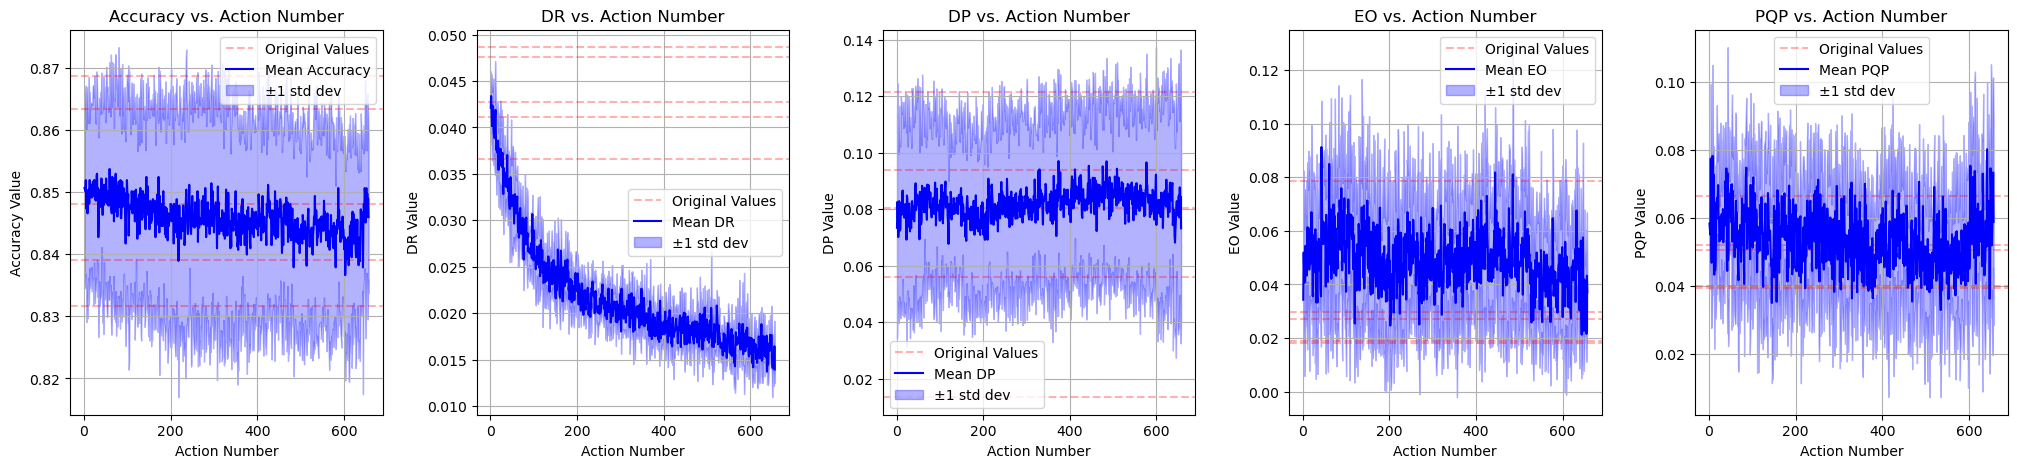

In [50]:
import pandas as pd
import numpy as np
from src.visualization.visualization2 import plot_results

def extract_original_values(fold):
    original_accuracy = fold.loc[0, 'new_accuracy']
    original_DR = fold.loc[0, 'new_DR']
    original_DP = fold.loc[0, 'new_DP']
    original_EO = fold.loc[0, 'new_EO']
    original_PQP = fold.loc[0, 'new_PQP']
    # original_recall = fold.loc[0, 'new_recall']
    # original_precision = fold.loc[0, 'new_precision']
    # original_sufficiency = fold.loc[0, 'new_sufficiency']
    return original_accuracy, original_DR, original_DP, original_EO, original_PQP

fold1 = pd.read_csv('saved_results/recruit/fairSHAP-DR_0.05_NN_1-fold_results.csv')
fold2 = pd.read_csv('saved_results/recruit/fairSHAP-DR_0.05_NN_2-fold_results.csv')
fold3 = pd.read_csv('saved_results/recruit/fairSHAP-DR_0.05_NN_3-fold_results.csv')
fold4 = pd.read_csv('saved_results/recruit/fairSHAP-DR_0.05_NN_4-fold_results.csv')
fold5 = pd.read_csv('saved_results/recruit/fairSHAP-DR_0.05_NN_5-fold_results.csv')

fold1_original_values = extract_original_values(fold1)
fold2_original_values = extract_original_values(fold2)
fold3_original_values = extract_original_values(fold3)
fold4_original_values = extract_original_values(fold4)
fold5_original_values = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

folds = [fold1, fold2, fold3, fold4, fold5]
original_accuracy = [fold1_original_values[0], fold2_original_values[0], fold3_original_values[0], fold4_original_values[0], fold5_original_values[0]]
original_drs = [fold1_original_values[1], fold2_original_values[1], fold3_original_values[1], fold4_original_values[1], fold5_original_values[1]]
original_dps = [fold1_original_values[2], fold2_original_values[2], fold3_original_values[2], fold4_original_values[2], fold5_original_values[2]]
original_eos = [fold1_original_values[3], fold2_original_values[3], fold3_original_values[3], fold4_original_values[3], fold5_original_values[3]]
original_pqps = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_recalls = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_precisions = [fold1_original_values[5], fold2_original_values[5], fold3_original_values[5], fold4_original_values[5], fold5_original_values[5]]
# original_sufficiencies = [fold1_original_values[6], fold2_original_values[6], fold3_original_values[6], fold4_original_values[6], fold5_original_values[6]]

# 调用函数
plot_results(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    stop_when_no_data=3,
    min_action=1,
    figsize=None,
    fill_alpha=0.3,
    fill_color='b',
    red_alpha=0.3  # 红线透明度
)

In [51]:
fold_last_rows = [
    fold1.iloc[-1], 
    fold2.iloc[-1], 
    fold3.iloc[-1], 
    fold4.iloc[-1], 
    fold5.iloc[-1]
]

# 转换为 DataFrame 以便计算均值和标准差
df_last_rows = pd.DataFrame(fold_last_rows)

# 计算每列的 mean 和 std
mean_values = df_last_rows.mean()
std_values = df_last_rows.std()

# 组合成新的 DataFrame，显示 "mean ± std" 形式
result_df = pd.DataFrame({
    "Mean": mean_values,
    "Std": std_values,
    "Mean ± Std": mean_values.round(4).astype(str) + " ± " + std_values.round(4).astype(str)
})
result_df

,Mean,Std,Mean ± Std
action_number,720.800000,127.014566,720.8 ± 127.0146
new_accuracy,0.844778,0.019965,0.8448 ± 0.02
new_DR,0.016020,0.001981,0.016 ± 0.002
new_DP,0.094953,0.038196,0.095 ± 0.0382
new_EO,0.054212,0.028943,0.0542 ± 0.0289
new_PQP,0.052593,0.040334,0.0526 ± 0.0403


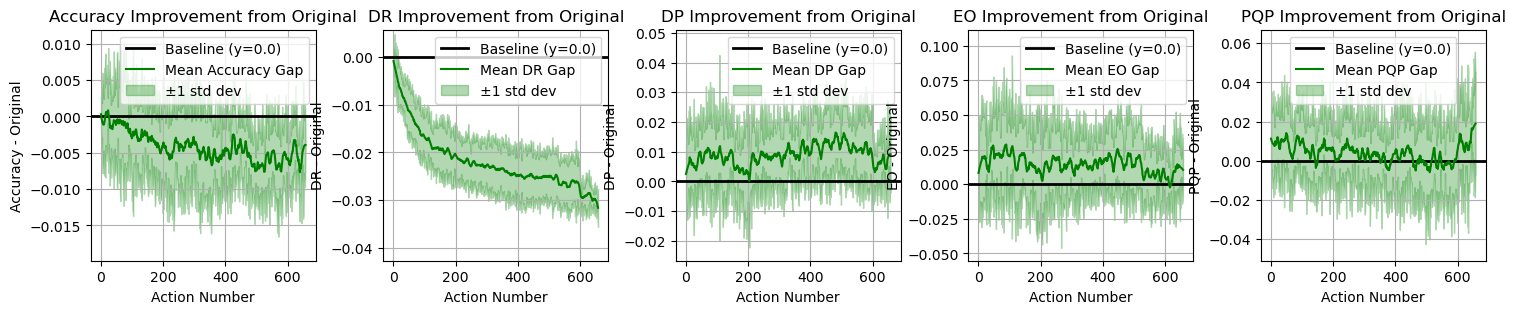

In [52]:
from src.visualization.visualization1 import plot_fairness_improvement

plot_fairness_improvement(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs,
    original_DP=original_dps,
    original_EO=original_eos,
    original_PQP=original_pqps,
    stop_when_no_data=3,  # 当有 3 个 fold 无数据时停止
    min_action=1,
    baseline=0.0,
    figsize=(18,3),
    fill_alpha=0.3,
    fill_color='g',
    smooth_window=20,
    smooth_polyorder=2,
)